# Proyecto Final Samsung Inovation Campus (Legion IA)
---

## Importación de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import openpyxl 

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## Preparacion de la Data 

### Separacion 

In [14]:
original_df = pd.read_excel('Excelaquaattributes.xlsx')
original_df['class'] = original_df['class'].replace(['yes', 'no'], [1, 0])

original_df['Conductivity'] = pd.to_numeric(original_df['Nitrate'], errors='coerce')
original_df['Nitrate'] = pd.to_numeric(original_df['Nitrate'], errors='coerce')
original_df['Fecalcaliform'] = pd.to_numeric(original_df['Nitrate'], errors='coerce')

original_df.info()
print(original_df)

original_df.to_csv('Data.csv', index=False)

# Extraccion los últimos 300 registros
records = original_df.tail(300)

# Nuevo DataFrame con los ultimos 300 registros
testing_df = records.copy()

# Eliminacion los últimos 300 registros del DataFrame de entrenamiento
training_df = original_df.drop(original_df.tail(300).index)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    1327 non-null   float64
 1   D.O            1352 non-null   float64
 2   pH             1360 non-null   float64
 3   Conductivity   1151 non-null   float64
 4   B.O.D          1293 non-null   float64
 5   Nitrate        1151 non-null   float64
 6   Fecalcaliform  1151 non-null   float64
 7   Totalcaliform  1226 non-null   float64
 8   class          1361 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 95.8 KB
      Temperature   D.O   pH  Conductivity  B.O.D  Nitrate  Fecalcaliform  \
0             9.0   9.0  8.0           0.2    0.1      0.2            0.2   
1            10.0   9.0  8.0           0.4    0.3      0.4            0.4   
2            11.0   9.0  8.0           0.3    0.2      0.3            0.3   
3            13.0   9.0  8.0           0.4    0.2  

C:\Users\jesus\AppData\Local\Temp\ipykernel_11780\2487951862.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  original_df['class'] = original_df['class'].replace(['yes', 'no'], [1, 0])


### Limpieza

In [3]:
#Reemplazo de valores nulos (usando el promedio de la columna)
#En valores de entrenamiento
training_df.fillna(training_df.mean(),inplace=True)
#En valores de prueba
testing_df.fillna(testing_df.mean(),inplace=True)

# Guardado de DataFrames
testing_df.to_csv('Test Records.csv', index=False)
training_df.to_csv('Training Records.csv', index=False)

### Ordenado para entrenamiento

In [4]:
#Separacion de Entradas y Salidas para entranamiento
inp= training_df[['Temperature', 'D.O','pH','Conductivity', 'B.O.D','Nitrate', 'Fecalcaliform','Totalcaliform']].to_numpy()
out= training_df[['class']].to_numpy()

#Escalado de datos
scaler = StandardScaler()
inp_training_scaled = scaler.fit_transform(inp)

## Red Neuronal

### Modelos

#### Modelo #1

In [6]:
hidden_layer1 = tf.keras.layers.Dense(units=3, input_shape=[6], activation='relu')
hidden_layer2 = tf.keras.layers.Dense(units=3, activation='relu')
output = tf.keras.layers.Dense(units=1, activation='sigmoid')

model = tf.keras.Sequential([hidden_layer1,hidden_layer2,output])

c:\Users\jesus\OneDrive\Escritorio\Education\Samsung Inovation Campus\Clases\Asignaciones\Semana 7\Quizz\pandas_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Modelo #2

In [33]:
hidden_layer1 = tf.keras.layers.Dense(units=32, input_shape=[9], activation='relu')
hidden_layer2 = tf.keras.layers.Dense(units=16, activation='relu')
hidden_layer3 = tf.keras.layers.Dense(units=8, activation='relu')
output = tf.keras.layers.Dense(units=1, activation='sigmoid')

model = tf.keras.Sequential([hidden_layer1, hidden_layer2, hidden_layer3, output])

c:\Users\jesus\OneDrive\Escritorio\Education\Samsung Inovation Campus\Clases\Asignaciones\Semana 7\Quizz\pandas_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Modelo #3 **(Elegido)**

In [5]:
n=8
input_layer = layers.InputLayer(shape=(n,))

hidden_layer1 = layers.Dense(units=36, activation='relu')
batch_norm1 = layers.BatchNormalization() # Normalizacion layer
dropout1 = tf.keras.layers.Dropout(0.1)

hidden_layer2 = layers.Dense(units=24, activation='relu')
batch_norm2 = layers.BatchNormalization()
dropout2 = layers.Dropout(0.2)

hidden_layer3 = layers.Dense(units=16, activation='relu')
batch_norm3 = layers.BatchNormalization()

hidden_layer4 = layers.Dense(units=8, activation='relu')
batch_norm4 = layers.BatchNormalization()

output = layers.Dense(units=1, activation='sigmoid')

model = keras.Sequential([
    input_layer,
    hidden_layer1,batch_norm1,dropout1,
    hidden_layer2,batch_norm2,dropout2,
    hidden_layer3,batch_norm3,
    hidden_layer4,batch_norm4,    
    output
])

### Compilación y Entrenamiento del Modelo

#### Compilación

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### Entrenamiento

In [7]:
print("Entrenando...")
#Callback para detencion en caso de que el modelo deje de aprender
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=250, restore_best_weights=True)
#Callback para guardar el mejor modelo
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

#Ejecución entrenamiento
historial = model.fit(inp_training_scaled, out, epochs=1000, verbose=0, validation_split=0.02, callbacks= [early_stopping, model_checkpoint])
print("Entrenado")

Entrenando...
Entrenado


### Métricas

#### Resumen del Modelo

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 36)             │           324 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 36)             │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,945 (23.23 KB)

 Trainable params: 1,925 (7.52 KB)

 Non-trainable params: 168 (672.00 B)

 Optimizer params: 3,852 (15.05 KB)

#### Entrenamiento #1

Claves del historial: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Último valor de pérdida: 0.03527327626943588
Último valor de exactitud: 0.9836381077766418


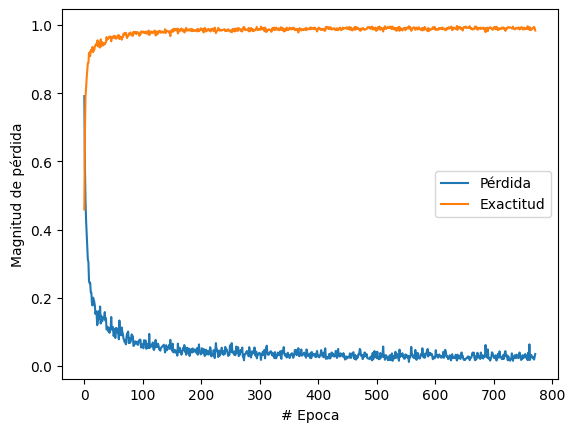

In [12]:
#Obtencion de valores de Precición y Perdida
print("Claves del historial:", historial.history.keys())
loss_values = historial.history['loss']
accuracy_values = historial.history['accuracy']
print("Último valor de pérdida:", loss_values[-1])
print("Último valor de exactitud:", accuracy_values[-1])

#Vista grafica de los Valores
plt.figure()
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"], label='Pérdida')
plt.plot(historial.history["accuracy"], label='Exactitud')
plt.legend()
plt.show()